# K Means Clustering

This notebook will build K-means clustering from scratch, then implement it with the [Penguin dataset](https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris) dataset. We will then implement sklearn's principle component and k-means clustering algorithms on the same dataset.

#### Clustering

Clustering, within the realm of data mining, primarily focuses on identifying structure or trends within untagged datasets. It autonomously organizes the data into clusters based on shared characteristics.

### About the dataset

The dataset consists of 344 rows and 7 columns. There are three different species of penguins: Chinstrap, Adélie, and Gentoo penguins. The columns are:

* species: penguin species (Chinstrap, Adélie, or Gentoo)
* island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* bill: bill length (mm)
* bill_depth_mm: bill depth (mm)
* flipper_length_mm: flipper length (mm)
* body_mass_g: body mass (g)
* sex: penguin sex

### Tools

This notebook uses the following libraries:

* [matplotlib](http://metplotlib.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [pandas](http://pandas.pydata.org)
* [seaborn](https://seaborn.pydata.org/)
* [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA) in [sklearn.decomposition](https://scikit-learn.org/stable/modules/classes.html?highlight=decomposition#module-sklearn.decomposition)
* [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler) in [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

In [1]:
#Import libraries
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#sklearn imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Data Pre-Processing

Import data and check the dimensions.

In [2]:
# Import Penguins dataset
penguins = pd.read_csv("Data/penguins.csv")

# Remove the rows with NaN values from the dataset
penguins = penguins.dropna()

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [3]:
penguins.shape

(333, 7)

After removing the rows with NaN values from the dataset, the cleaned dataset has 333 rows and 7 columns.

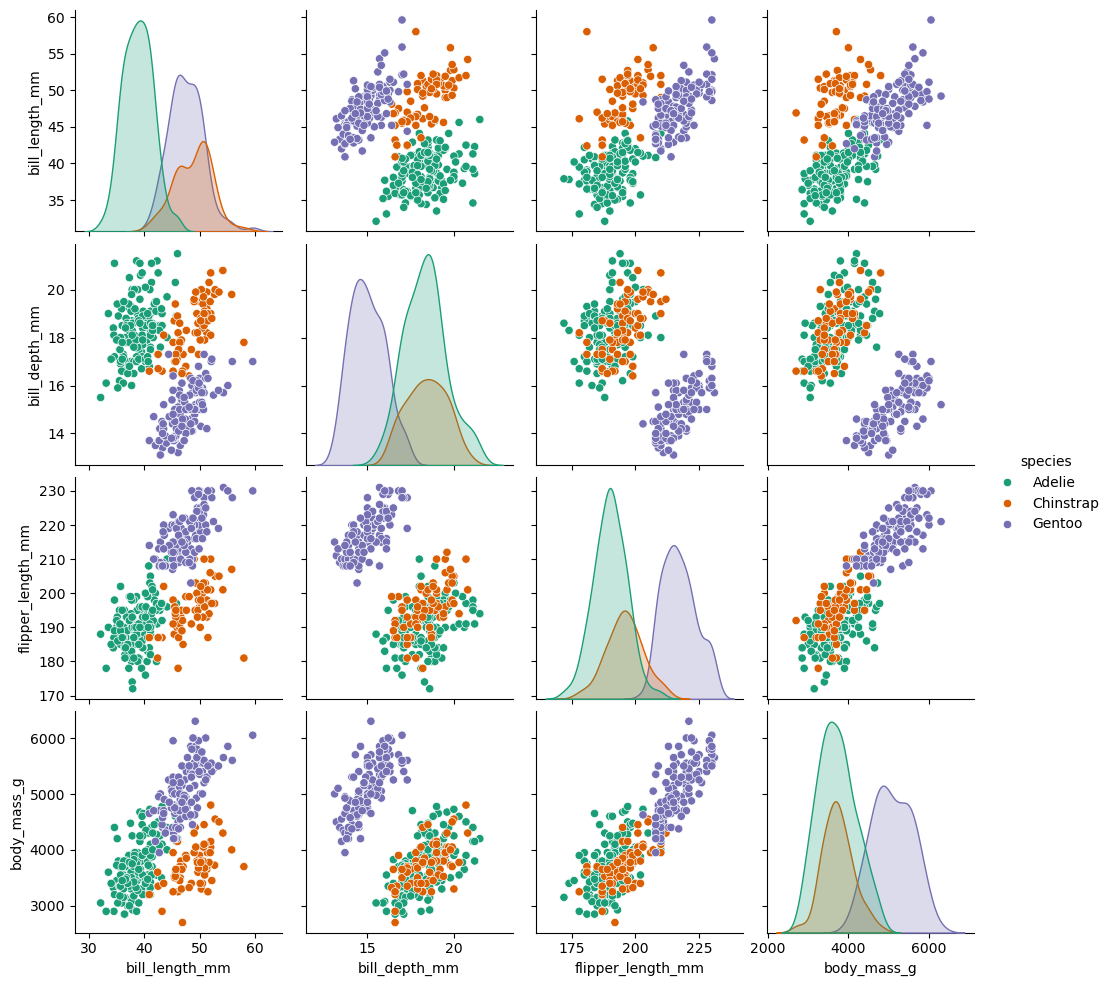

In [4]:
# Plot the scatterplot for each pair of features
sns.pairplot(penguins, hue='species', palette='Dark2')

Some feature combinations effectively divide the data into three distinct categories, but the majority of features lack this capability. 

Additionally, we standardize the "body_mass_g" feature to align its scale with the other variables. This facilitates distance calculation between features and could potentially enhance algorithm performance.

For transformation this notebook use [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) tool in sklearn.preprocessing. It can directly standarlize all the features to the same scale.

In [5]:
# Extract out the features, and convert to numpy array
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].to_numpy()
X

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

In [8]:
# Check the dimensions before PCA
X.shape

(333, 4)

We employ PCA to decrease the data's dimensions, aiding in determining the optimal number of dimensions necessary to differentiate the three penguin species more effectively while minimizing information loss. 

Further, for enhanced comparison, I generate a scatter plot depicting the relationship between the last two features, "flipper_length_mm" and "body_mass_g".

In [9]:
# Extract out labels, and convert to numpy array
y = penguins[['species']].to_numpy()

# Change labels to numeric labels
for i, label in enumerate(y):
    if label == "Adelie":
        y[i] = 0.0
    elif label == "Chinstrap":
        y[i] = 1.0
    else:
        y[i] = 2.0

Text(0.5, 1.0, 'Flipper length vs. Body Mass (Before PCA)')

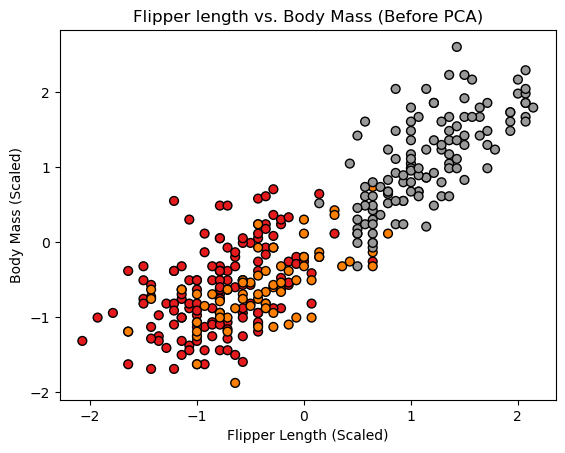

In [10]:
# Plot the scatterplot for the first two features
plt.scatter(X[:, 2], X[:, 3], c=y,
            cmap = plt.cm.Set1,
            edgecolor = "k",
            s = 40)
plt.xlabel('Flipper Length (Scaled)')
plt.ylabel('Body Mass (Scaled)')
plt.title("Flipper length vs. Body Mass (Before PCA)")

##### Implement PCA using  [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) tool to reduce the dimension to only two.

In [11]:
# Use PCA to reduce the dimension of the dataset to only 2 dimentions
X_reduced = PCA(n_components = 2).fit_transform(X)

In [12]:
X_reduced.shape

(333, 2)

PCA reduces the dimension to 2.

Let's plot the projected points after PCA. 

Text(0.5, 1.0, 'Penguins Features After PCA')

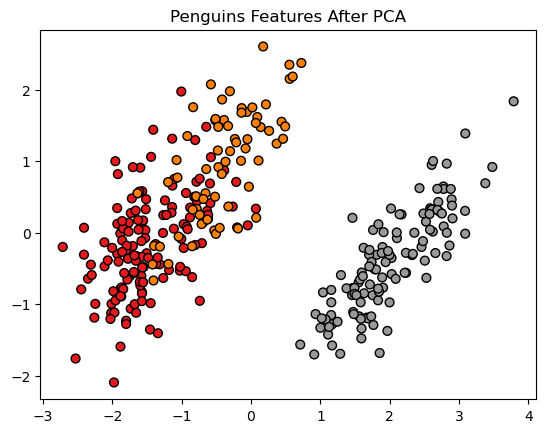

In [13]:
# Plot the features after PCA
plt.scatter(X_reduced[:, 0],
            X_reduced[:, 1],
            c = y,
            cmap = plt.cm.Set1,
            edgecolor = "k",
            s = 40)
plt.title("Penguins Features After PCA")

Comparison of scatter plots before PCA and after PCA suggests that PCA separates the data well. 

However,visual inspection alone may not be sufficient. To delve deeper, let's implement a K-means clustering algorithm for further investigation.

### Build the K Means Clustering Algorithm

#### Initiate K Centroids

Let's try K=2 on the original dataset before PCA.

In [14]:
# Randomly select K starting centroids
k = 2
C = []
for _ in range(k):
    i = np.random.randint(len(X))
    C.append(X[i, :])

In [15]:
# Check the dimension of the centroids
C

[array([-1.29893902,  0.72987456, -0.85510678, -0.87941779]),
 array([-1.04254994,  1.03501985, -0.85510678, -0.31972038])]

The randomly selected centroids have the same number of features (4 variables) as the original Penguins dataset.

##### Use Euclidean distance between  two points

In [16]:
# Define the distance function to calculate Euclidean distance between two points
def distance(v, w):
    return np.sqrt((v - w) @ (v - w))

In [17]:
# Check the distance function between one of the first centroid and the first data point in the dataset
distance(C[0], X[0])

0.7670566464470441

#### Define the Assignment Function


To estimate the distance from each data point to every centroid, and return the index of the nearest centroid.

In [18]:
# Define Assignment function
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

In [19]:
# Check the Assignment function on the first data point in the dataset
assignment(X[0], C)

1

Scatter plot to see the assignment for the first set of centroids.

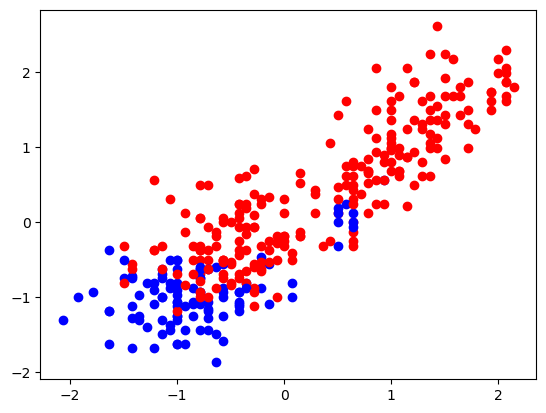

In [20]:
# Scatter plot to show the assignments
for x in X:
    
    # Mark the points assigned to the first cluster in blue
    if assignment(x, C) == 0:
        plt.scatter(x[2], x[3], color = "blue")
        
    # Mark the points assigned to the second cluster in red
    else:
        plt.scatter(x[2], x[3], color = "red")
        
plt.show()

Scatter plot above shows that few points are assigned to the second cluster. Group up the data points assigned to the same cluster, and update the centroids.

#### Group up the Assigned Points

To group up the points that assigned to the same cluster, we define a function names "make_classes".

In [21]:
# Define a function to group up the assigned points
def make_classes(data, Centroids):
    A = dict()
    
    # Make the lists for every centroid separately
    for i in range(len(Centroids)):
        A[i] = []
    
    # Assigned every data points to the class list
    for x in data:
        A[assignment(x, Centroids)].append(x)
        
    return A

In [22]:
# Check the functions
A = make_classes(X, C)
A[0][:5]

[array([-0.82278787,  0.11958397, -1.06947358, -0.50628618]),
 array([-0.67627982,  0.42472926, -0.42637319, -1.1903608 ]),
 array([-1.33556603,  1.0858774 , -0.56928439, -0.94160639]),
 array([-0.9326689 ,  0.32301416, -1.42675157, -0.72394629]),
 array([-0.52977177,  0.22129906, -1.35529597, -1.2525494 ])]

The printed 5 points in consistent to the blue points in the above scatter plot, suggesting that the "make_classes" function works well.

#### Update the Centroids

To update the centroids, calculate the mean points for every class and move the centroids to the mean points.

In [23]:
# Update the centroids
def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    
    # Calculate the mean points for every class
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))
        
    return new_Centroids

Let's check the function!

In [24]:
new_C = new_centroids(X, C)

In [25]:
C

[array([ 2.18062708, -0.08384623,  1.93166154,  1.73250347]),
 array([-0.27338269,  1.79788309, -0.283462  ,  0.36435424])]

In [25]:
new_C

[array([-0.94387037,  0.04156947, -0.80099478, -0.9391913 ]),
 array([ 0.42268977, -0.01861589,  0.35870636,  0.42059437])]

The centroids have shifted! And, the updated centroids align with our earlier observations from the scatter plot, appearing to be positioned at the cluster centers. 

Now, let's integrate the algorithm functions and run it for four iterations to observe how the assignments change, gaining a more intuitive understanding of how the K-means algorithm operates.

In [26]:
# Define a function to randomly initiate the starting centoids
def initialize_centroids(data, k = 2):
    Centroids = []
    for _ in range(k):
        i = np.random.randint(len(X))
        Centroids.append(X[i, :])
    return Centroids

# Define Assignment function
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

# Define a function to group up the assigned points
def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []
    for x in data:
        A[assignment(x, Centroids)].append(x)       
    return A

# Update the centroids
def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))   
    return new_Centroids

In [27]:
# Set K=3 and Try 4 iterations
k = 3
C0 = initialize_centroids(X, k = k)
C1 = new_centroids(X, C0)
C2 = new_centroids(X, C1)
C3 = new_centroids(X, C2)

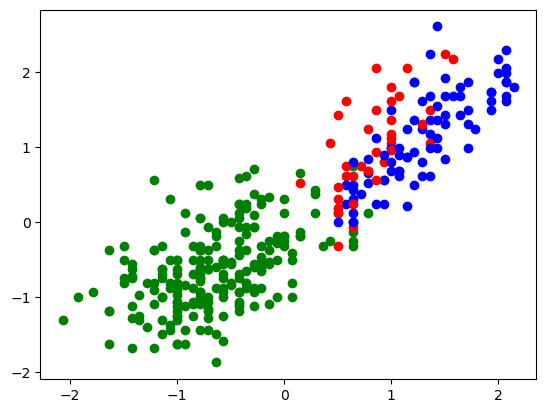

In [28]:
# Scatter plot for the first round assignment with the starting centroids
for x in X:
    if assignment(x, C0) == 0:
        plt.scatter(x[2], x[3], color = "blue")
    elif assignment(x, C0) == 1:
        plt.scatter(x[2], x[3], color = "green")
    else:
        plt.scatter(x[2], x[3], color = "red")

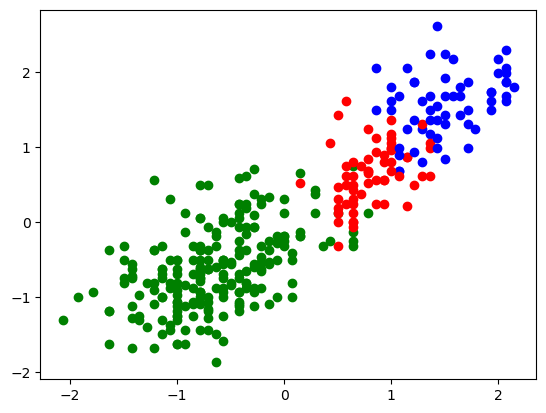

In [29]:
# Scatter plot for the second round assignment with the first updated centroids
for x in X:
    if assignment(x, C1) == 0:
        plt.scatter(x[2], x[3], color = "blue")
    elif assignment(x, C1) == 1:
        plt.scatter(x[2], x[3], color = "green")
    else:
        plt.scatter(x[2], x[3], color = "red")

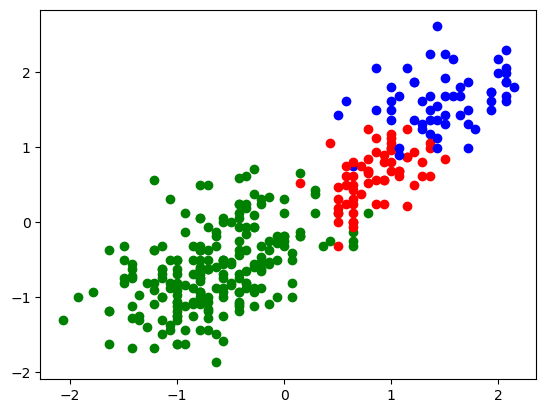

In [30]:
# Scatter plot for the third round assignment with the second updated centroids
for x in X:
    if assignment(x, C2) == 0:
        plt.scatter(x[2], x[3], color = "blue")
    elif assignment(x, C2) == 1:
        plt.scatter(x[2], x[3], color = "green")
    else:
        plt.scatter(x[2], x[3], color = "red")

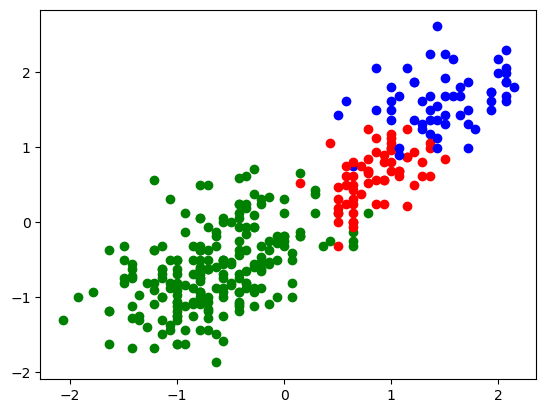

In [31]:
# Scatter plot for the third round assignment with the second updated centroids
for x in X:
    if assignment(x, C3) == 0:
        plt.scatter(x[2], x[3], color = "blue")
    elif assignment(x, C3) == 1:
        plt.scatter(x[2], x[3], color = "green")
    else:
        plt.scatter(x[2], x[3], color = "red")

From the above scatter plots, it seems some data points which are near clusters boundary change color when centroids are updated.

#### Fitting and Prediction

Next, we establish the fitting function.

For the stopping criteria, we establish conditions. Iterations halt either when the maximum iteration limit is reached or when the maximum distance between previous centroids and updated centroids falls below the epsilon value.

By default, we configure the maximum iteration count to 100 and set epsilon to $0.01$.


In [32]:
def fit(data, k = 3, max_iterations = 100, epsilon = 0.01):
    C_old = initialize_centroids(X, k = k)
    C_new = new_centroids(data, C_old)  
    
# try to achieve stpe 4 to find the centroids no longer move below:
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_iterations:
        C_old, C_new = C_new, new_centroids(data, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1
        
    return C_new

#### Define Loss Function

In [33]:
def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)
        
    return sum(x for x in errors)

So far, the basic of the K Means Clustering algorithm is built. Let's put all the functions together.

In [48]:
# Define a function to randomly initiate the starting centoids
def initialize_centroids(data, k = 3):
    Centroids = []
    for _ in range(k):
        i = np.random.randint(len(X))
        Centroids.append(X[i, :])
    return Centroids

# Define Assignment function
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

# Define a function to group up the assigned points
def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []
    for x in data:
        A[assignment(x, Centroids)].append(x)       
    return A

# Update the centroids
def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))   
    return new_Centroids

# Define the fitting function
def fit(data, k = 3, max_iterations = 100, epsilon = 0.01):
    C_old = initialize_centroids(X, k = k)
    C_new = new_centroids(data, C_old)  
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_iterations:
        C_old, C_new = C_new, new_centroids(data, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1  
    return C_new

# Define the Loss function
def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)
        
    return sum(x for x in errors)

In [47]:
# Check the MSE after fitting
C = fit(X)
print(mse_classes(X, C))

185.99456957157327


The MSE values is acceptable! 

#### Choose the K Value by Elbow Method

To choose the optimal value k, this notebook use elbow method.

In [52]:
# Fit the model for K from 1 to 6
C1 = fit(X, k = 1)
C2 = fit(X, k = 2)
C3 = fit(X, k = 3)
C4 = fit(X, k = 4)
C5 = fit(X, k = 5)
C6 = fit(X, k = 6)
#C7 = fit(X, k = 7)
#C8 = fit(X, k = 8)
#C9 = fit(X, k = 9)
C = [C2, C3, C4, C5, C6]

Text(0.5, 1.0, 'K Values vs. MSE')

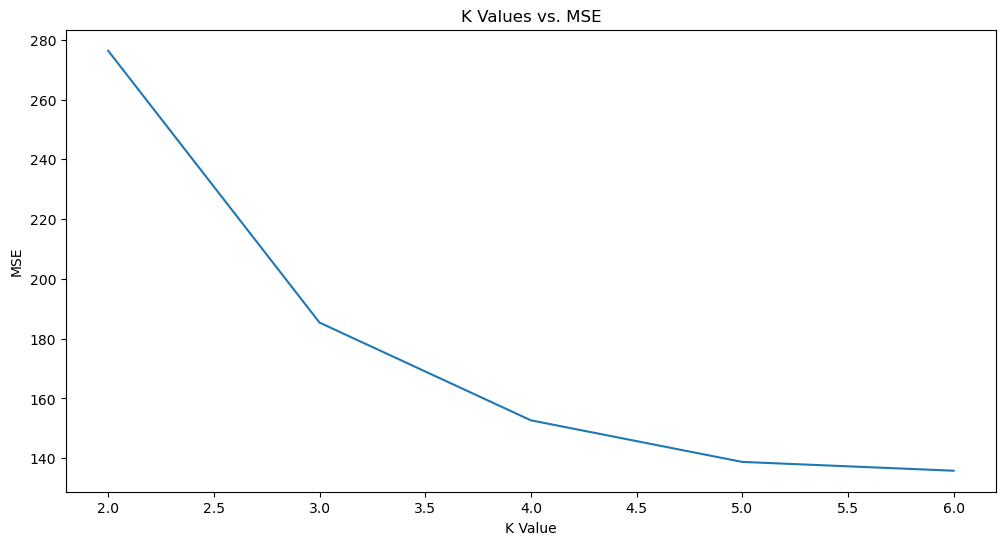

In [53]:
# Plot the loss function with K values
errors = [mse_classes(X, centroids) for centroids in C]
plt.figure(figsize=(12, 6))
plt.plot([i for i in range(2, 7)], errors)
plt.xlabel("K Value")
plt.ylabel("MSE")
plt.title("K Values vs. MSE")

From the plot, K=3 is the elbow point, which is consistent to the original number of the labels in the Penguins dataset.

---

### Implement K Means Clustering after PCA



In [54]:
# Define a function to randomly initiate the starting centoids
def initialize_centroids(data, k = 3):
    Centroids = []
    for _ in range(k):
        i = np.random.randint(len(X_reduced))
        Centroids.append(X_reduced[i, :])
    return Centroids

# Define Assignment function
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

# Define a function to group up the assigned points
def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []
    for x in data:
        A[assignment(x, Centroids)].append(x)       
    return A

# Update the centroids
def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))   
    return new_Centroids

# Define the fitting function
def fit(data, k = 3, max_iterations = 100, epsilon = 0.01):
    C_old = initialize_centroids(X_reduced, k = k)
    C_new = new_centroids(data, C_old)  
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_iterations:
        C_old, C_new = C_new, new_centroids(data, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1  
    return C_new

# Define the Loss function
def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)
        
    return sum(x for x in errors)

In [55]:
# Check the MSE after fitting
C = fit(X_reduced)
print(mse_classes(X_reduced, C))

111.80760258001867


The MSE is smaller than the MSE of the model before PCA when K=3, suggesting that after PCA, the K Means Clustering algorithm perform better when K=3.

We can also use the elbow method to find the optimal K value.

In [56]:
# Fit the model for K from 1 to 8
C1 = fit(X_reduced, k = 1)
C2 = fit(X_reduced, k = 2)
C3 = fit(X_reduced, k = 3)
C4 = fit(X_reduced, k = 4)
C5 = fit(X_reduced, k = 5)
C6 = fit(X_reduced, k = 6)
C7 = fit(X_reduced, k = 7)
C8 = fit(X_reduced, k = 8)
#C9 = fit(X_reduced, k = 9)
C = [C2, C3, C4, C5, C6, C7, C8]

Text(0.5, 1.0, 'K Values vs. MSE')

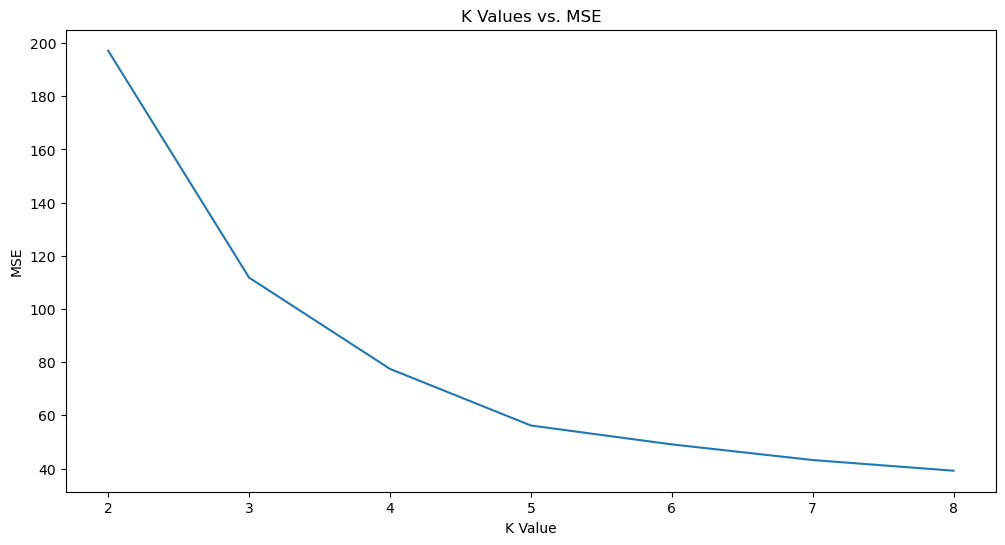

In [57]:
# Plot the loss function with K values
errors = [mse_classes(X_reduced, centroids) for centroids in C]
plt.figure(figsize=(12, 6))
plt.plot([i for i in range(2, 9)], errors)
plt.xlabel("K Value")
plt.ylabel("MSE")
plt.title("K Values vs. MSE")

Following PCA, K=3 remains the elbow point, aligning with the original number of labels in the Penguins dataset. Additionally, K=6 emerges as another optimal value.

Moreover, all MSE values are lower compared to those before PCA for the same K value. This indicates an improved performance of the K Means Clustering algorithm after PCA.

---

## Conclusion

* The K Means Clustering algorithm works well!
* Performance enhancement is observed when dimensionality reduction via PCA precedes the implementation of K Means Clustering.
* It's essential to scale the data if features exhibit differing scales.